In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving country_vaccinations.csv to country_vaccinations (3).csv


In [ ]:
df = pd.read_csv("country_vaccinations.csv")

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3081 non-null   object 
 1   iso_code                             2833 non-null   object 
 2   date                                 3081 non-null   object 
 3   total_vaccinations                   1980 non-null   float64
 4   people_vaccinated                    1643 non-null   float64
 5   people_fully_vaccinated              1016 non-null   float64
 6   daily_vaccinations_raw               1642 non-null   float64
 7   daily_vaccinations                   2960 non-null   float64
 8   total_vaccinations_per_hundred       1980 non-null   float64
 9   people_vaccinated_per_hundred        1643 non-null   float64
 10  people_fully_vaccinated_per_hundred  1016 non-null   float64
 11  daily_vaccinations_per_million

In [ ]:
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
df.isnull().sum()

country                                   0
iso_code                                248
date                                      0
total_vaccinations                     1101
people_vaccinated                      1438
people_fully_vaccinated                2065
daily_vaccinations_raw                 1439
daily_vaccinations                      121
total_vaccinations_per_hundred         1101
people_vaccinated_per_hundred          1438
people_fully_vaccinated_per_hundred    2065
daily_vaccinations_per_million          121
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
from plotly.subplots import make_subplots
import datetime
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
df.shape

(3081, 15)

In [ ]:
df= df.drop(df[df.total_vaccinations.isna()].index)

In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                      367
people_fully_vaccinated                971
daily_vaccinations_raw                 338
daily_vaccinations                      92
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred          367
people_fully_vaccinated_per_hundred    971
daily_vaccinations_per_million          92
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
df2 = df.drop(df[df.people_vaccinated.isnull()].index)

In [ ]:
df2.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                604
daily_vaccinations_raw                 228
daily_vaccinations                      60
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    604
daily_vaccinations_per_million          60
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
df2.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


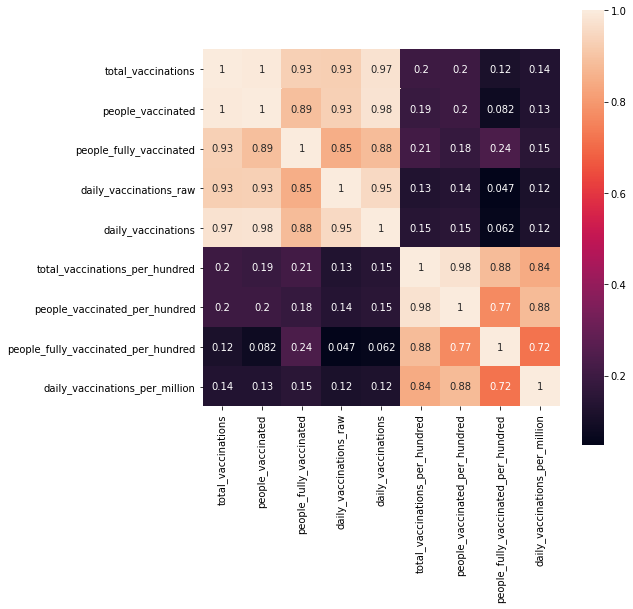

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True, square=True)
plt.show()

In [ ]:
import scipy
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
scipy.stats.mannwhitneyu(df2.total_vaccinations,df2.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=1344204.0, pvalue=0.10148339480959287)

In [ ]:
scipy.stats.mannwhitneyu(df2.total_vaccinations_per_hundred,df2.people_fully_vaccinated_per_hundred,alternative='two-sided')

MannwhitneyuResult(statistic=1213460.0, pvalue=0.0009491169914363914)

In [ ]:
mean_1=df2.total_vaccinations.mean() - df2.people_vaccinated.mean()
mean_2=df2.total_vaccinations_per_hundred.mean() - df2.people_fully_vaccinated_per_hundred.mean()

In [ ]:
print(mean_1)
print(mean_2)

205907.57036577817
4.159715763337658


In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                      367
people_fully_vaccinated                971
daily_vaccinations_raw                 338
daily_vaccinations                      92
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred          367
people_fully_vaccinated_per_hundred    971
daily_vaccinations_per_million          92
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
df['people_vaccinated']=df.people_vaccinated.fillna(df.total_vaccinations - mean_1)


In [ ]:
df['people_vaccinated_per_hundred']=df.people_vaccinated.fillna(df.total_vaccinations_per_hundred - mean_2)

In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                971
daily_vaccinations_raw                 338
daily_vaccinations                      92
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    971
daily_vaccinations_per_million          92
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
scipy.stats.mannwhitneyu(df2.total_vaccinations,df2.people_fully_vaccinated,alternative='two-sided')

MannwhitneyuResult(statistic=1114209.0, pvalue=1.6968167891705135e-12)

In [ ]:
scipy.stats.mannwhitneyu(df2.people_fully_vaccinated_per_hundred,df2.total_vaccinations_per_hundred,alternative='two-sided')

MannwhitneyuResult(statistic=1388309.0, pvalue=0.0009491169914363914)

In [ ]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)

In [ ]:
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)

In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
daily_vaccinations_raw                 338
daily_vaccinations                      92
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million          92
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)

In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
daily_vaccinations_raw                 338
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
scipy.stats.mannwhitneyu(df2.daily_vaccinations_raw, df2.daily_vaccinations)

MannwhitneyuResult(statistic=1144518.0, pvalue=1.6948147261094466e-09)

In [ ]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [ ]:
df.isnull().sum()

country                                  0
iso_code                               148
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
daily_vaccinations_raw                   0
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,128.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,188.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,266.0,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,0.0,42.0,62.0,0.01,308.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
df[df.iso_code.isna()].country.unique()

array(['England', 'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [ ]:
df[df.country == 'England'] = df[df.country == 'England'].fillna('GB-ENG')
df[df.country == 'Northern Ireland'] = df[df.country == 'Northern Ireland'].fillna('GB-NIR')
df[df.country == 'Scotland']=df[df.country == 'Scotland'].fillna('GB-SCT')
df[df.country == 'Wales']=df[df.country == 'Wales'].fillna('GB-WLS')

In [ ]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
amount = df.groupby('country').max().sort_values('total_vaccinations',ascending=False)

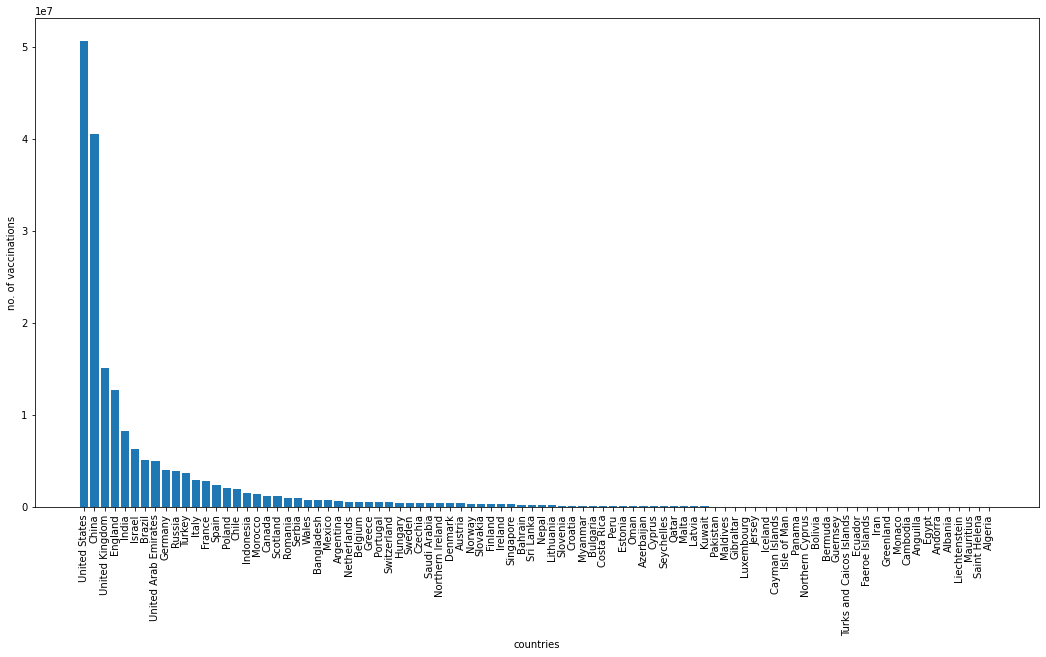

In [ ]:
plt.figure(figsize=(18,9))
plt.bar(amount.index,amount.total_vaccinations)
plt.xticks(rotation = 90)
plt.xlabel('countries')
plt.ylabel('no. of vaccinations')
plt.show()

In [ ]:
vacc = df.groupby('vaccines').sum().sort_values('total_vaccinations',ascending=False)



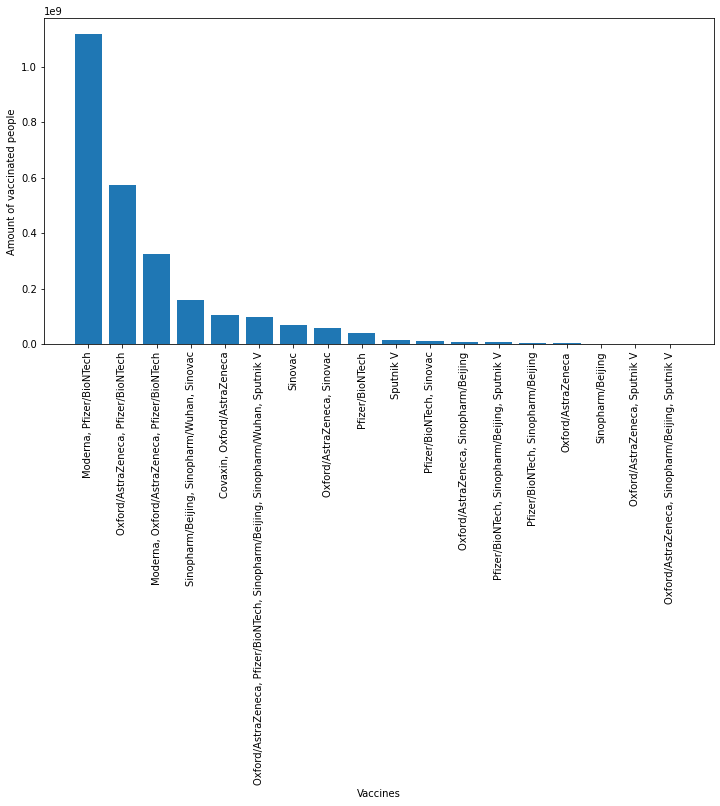

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(vacc.index,vacc.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people')
plt.xlabel('Vaccines')
plt.show()

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,128.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,188.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,266.0,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,0.0,42.0,62.0,0.01,308.0,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
cols = ['date','total_vaccinations']


In [ ]:
timeseries = df[cols].groupby('date').sum()[4:-1]

In [ ]:
timeseries.head()

,total_vaccinations
date,
2020-12-21,646370.0
2020-12-22,128838.0
2020-12-23,1186438.0
2020-12-24,266217.0
2020-12-25,307030.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

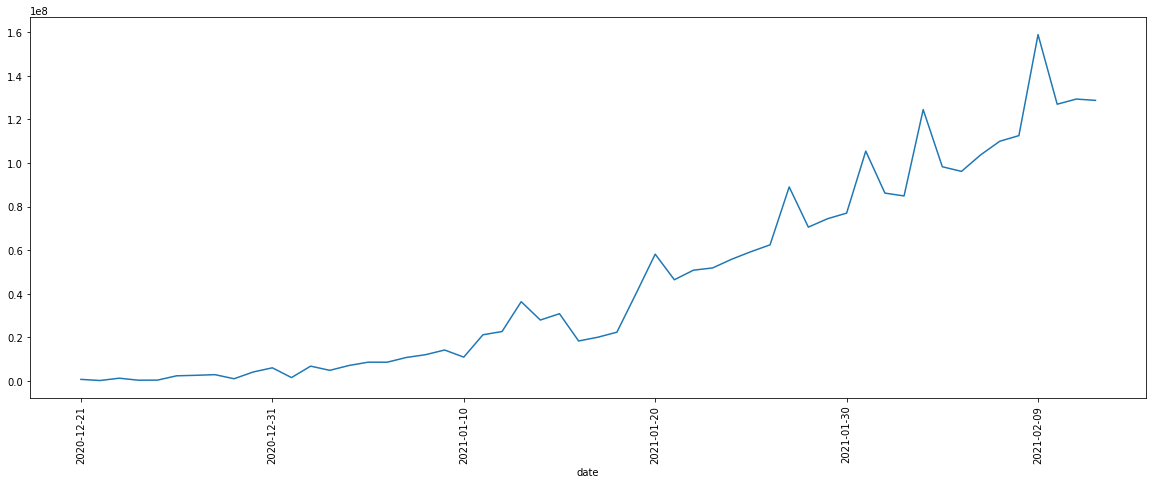

In [ ]:
plt.figure(figsize=(20,7))
timeseries.total_vaccinations.plot()
plt.xticks(rotation=90)


In [ ]:
data=df[['country','total_vaccinations','iso_code','vaccines']].groupby(['country','iso_code','vaccines']).sum().reset_index()

In [ ]:
data.head()

,country,iso_code,vaccines,total_vaccinations
0,Albania,ALB,Pfizer/BioNTech,5339.0
1,Algeria,DZA,Sputnik V,30.0
2,Andorra,AND,Pfizer/BioNTech,2903.0
3,Anguilla,AIA,Oxford/AstraZeneca,1341.0
4,Argentina,ARG,Sputnik V,9395342.0


In [ ]:
px.scatter_geo(data,locations='iso_code',size='total_vaccinations',color='country',title='country by vaccinations')

In [ ]:
million = df.groupby('country').sum().sort_values('daily_vaccinations_per_million',ascending=False)

In [ ]:
million

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Israel,164526770.0,1.181983e+08,46328441.0,6281852.0,6057930.0,1900.79,1.181983e+08,535.23,699891.0
Gibraltar,393041.0,3.296280e+05,62879.0,21141.0,21846.0,1166.59,3.296280e+05,186.63,648426.0
United Arab Emirates,99203657.0,9.154098e+07,250000.0,3641854.0,3656239.0,1003.04,9.154098e+07,2.53,369673.0
Seychelles,533837.0,4.973640e+05,36473.0,29760.0,29875.0,542.85,4.973640e+05,37.09,303795.0
Wales,11943666.0,1.190279e+07,40876.0,642117.0,587543.0,378.80,1.190279e+07,1.27,186352.0
...,...,...,...,...,...,...,...,...,...
Pakistan,27228.0,2.722800e+04,0.0,0.0,3404.0,0.01,2.722800e+04,0.00,15.0
Egypt,1315.0,-4.105001e+05,0.0,0.0,219.0,0.00,-4.105001e+05,0.00,2.0
Algeria,30.0,-4.117851e+05,0.0,30.0,30.0,0.00,-4.117851e+05,0.00,1.0


Text(0.5, 1.0, 'number of vaccinations per million')

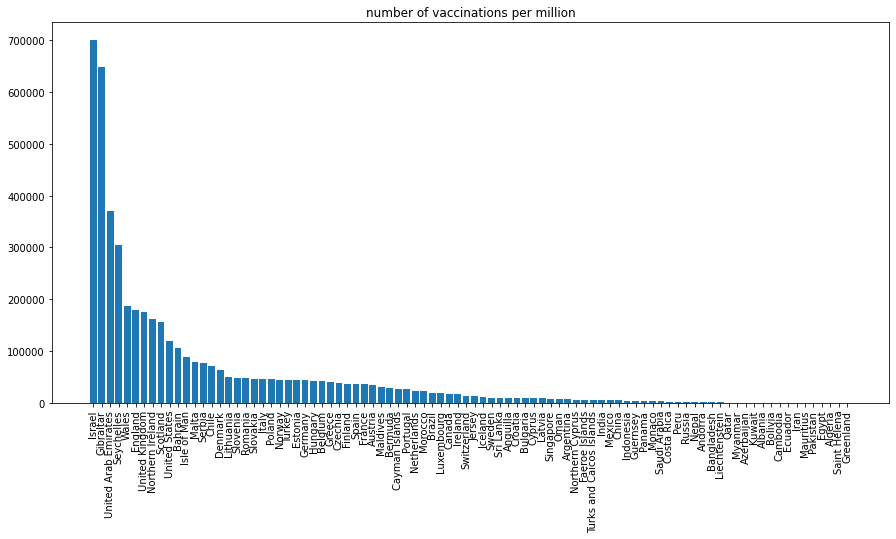

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
plt.bar(million.index,million.daily_vaccinations_per_million)
plt.xticks(rotation=90)
plt.title('number of vaccinations per million')

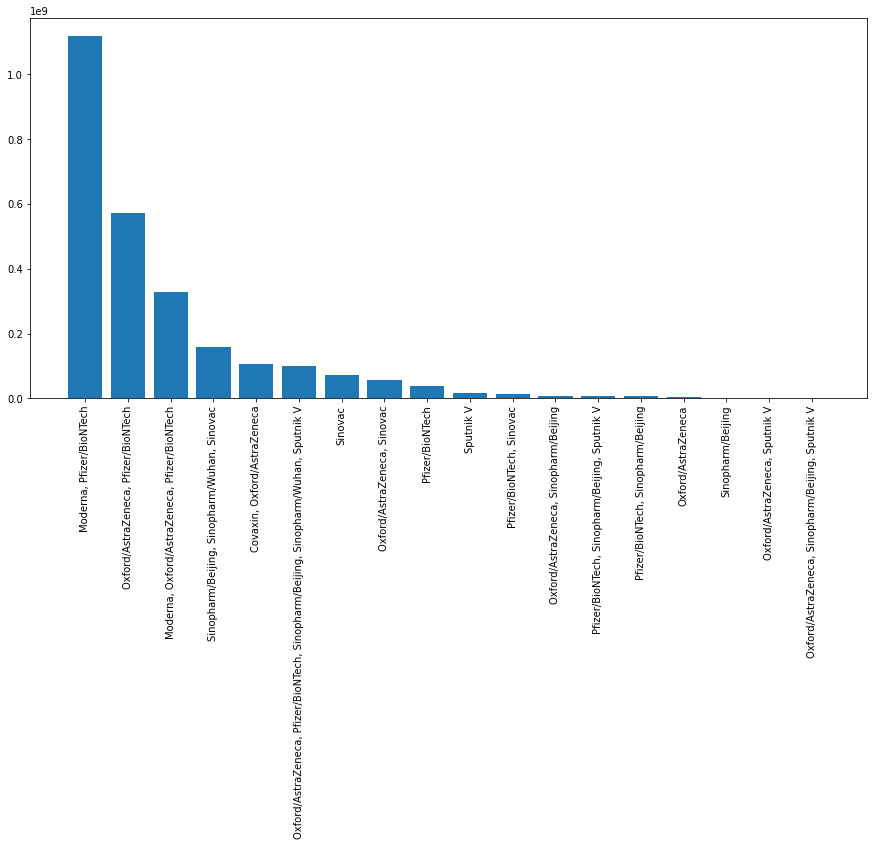

In [ ]:
data2 = df.groupby('vaccines').sum().sort_values('total_vaccinations',ascending=False)
plt.figure(figsize=(15,7))
plt.bar(data2.index,data2.total_vaccinations)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['date']=pd.to_datetime(df['date'])
df2=df.groupby('date').sum()

In [ ]:
df2['date_diff']=df2['total_vaccinations']
count=0
for index, row in df2.iterrows():
  row['date_diff']=count
  count+=1

In [ ]:
df2.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,date_diff
date,,,,,,,,,,
2020-12-13,172430.0,1.724300e+05,0.0,0.0,0.0,1.03,1.724300e+05,0.0,0.0,0.0
2020-12-15,1528500.0,1.322592e+06,0.0,0.0,0.0,0.12,1.322592e+06,0.0,0.0,1.0
2020-12-19,58.0,5.800000e+01,0.0,0.0,0.0,0.00,5.800000e+01,0.0,0.0,2.0
2020-12-20,1911206.0,1.911206e+06,0.0,7344.0,175225.0,4.97,1.911206e+06,0.0,6119.0,3.0
2020-12-21,646370.0,6.463700e+05,0.0,82760.0,74007.0,0.55,6.463700e+05,0.0,2033.0,4.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
x=df2[['date_diff']]
y=df2['total_vaccinations']
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.coef_)
print(model.intercept_)

[2439700.69701929]
-26645510.33220338


In [ ]:
prediction = model.predict(x)

In [ ]:
print(int(model.predict([[365]])))

863845244
